# Home Assignment No. 1: Practice

To solve this task efficiently, here are some practical suggestions:

* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that tutorials, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).


* Instead of rewriting existing code, if not explicitly asked to do so, use **BUILT-IN METHODS** available in the libraries. There exists a class/method for almost everything you can imagine (related to this homework).


* To complete this part of the homework, you have to write some **CODE** directly inside the specified places in the notebook **CELLS**.


* In some problems you are asked to provide a short discussion of the results. In these cases you have to create a **MARKDOWN** cell with your comments right after the corresponding code cell.


* For every separate problem, you can get **INTERMEDIATE scores**.


* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if a reviewer executes your code, the output will be the same (with all the corresponding plots) as in your uploaded files. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudo randomness.


* Your code must be readable to any competent reviewer. For this purpose, try to include **necessary** (and not more) comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY**.


* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameter and set it to `-1` to use all the cores.


* **IMPORTANT:** In the end you need to hand in a **single zip file** containing **two notebooks** (theory and practice) as well as the **html exported versions** of these notebooks. That is **4** files in total.


To begin let's import the essential (for this assignment) libraries.

In [234]:
import numpy as np

# for reproducibility
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Least Mean Squares

In the **regression** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have real-valued labels $y_{1}, \dots, y_{m} \in \mathbb{R}$.

In Least Mean Squares the hypothesis function is given by a linear combination of the features $h_{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x}$.

The maximum likelihood estimator for the Least Mean Squares problem is the solution of the following optimization problem.

$$
\theta^{*} = \arg \min_{\theta} \|\mathbf{X}\theta - \mathbf{y}\|^2,
$$

where $\mathbf{X}$ is a $m\times d$ matrix that has the feature vectors as rows and $\mathbf{y} \in \mathbb{R}^m$ is a vector consisting of all the labels.

This problem is known to have a unique closed-form solution in the case of a full-rank $\mathbf{X}$. 

$$
\theta^{*} = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In the first part of this assignment you are asked to implement this solution.

## Task 1: Regressor Class [10 points]

In this task you are asked to implement a regressor class that fits the Least Squares parameters to the data and performs predictions at new data points. You need to implement 3 methods: fit, predict and score. `fit` estimates and stores the coefficients of the linear regression in *self.coef_*. `predict` performs prediction using the estimated coefficients. `score` calculates the mean squared error. 

In [235]:
class LeastSquares(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        ### BEGIN Solution
        # Added a column of ones to include the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
        self.coef_ = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        assert self.coef_ is not None, "Fit the model first!"
        
        ### BEGIN Solution
        # Added a column of ones to include the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
        predictions = X_b.dot(self.coef_)
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param x: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        # Calculate predictions
        predictions = self.predict(X)
        # Calculate mean squared error 
        mse = np.mean((predictions - y) ** 2)
        return mse
        ### END Solution

## Task 2. Regression Line [10 points]

In this task, your goal is to visualize the **regression line** of **Least Mean Squares** applied to a synthetic dataset. In the cell below we generate the dataset.

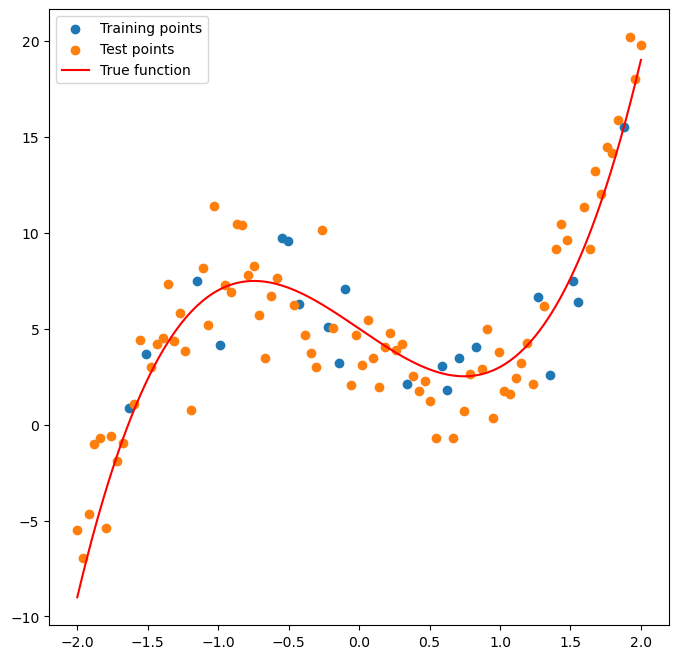

In [236]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

def f(X, noise_rate: float = 0):
    return 3 * X**3 - 5 * X + 5 + noise_rate * np.random.randn(X.shape[0])

n_samples = 100
X = np.linspace(-2, 2, n_samples)
y = f(X, noise_rate=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=0)

fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot()

plt.legend()
plt.show()

In [237]:
print(X.shape)
print(y.shape)

(100,)
(100,)


Fit your model to the training data and visualize the predictions on the same plot with the data points. Report the mean squared error on the training and test data.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


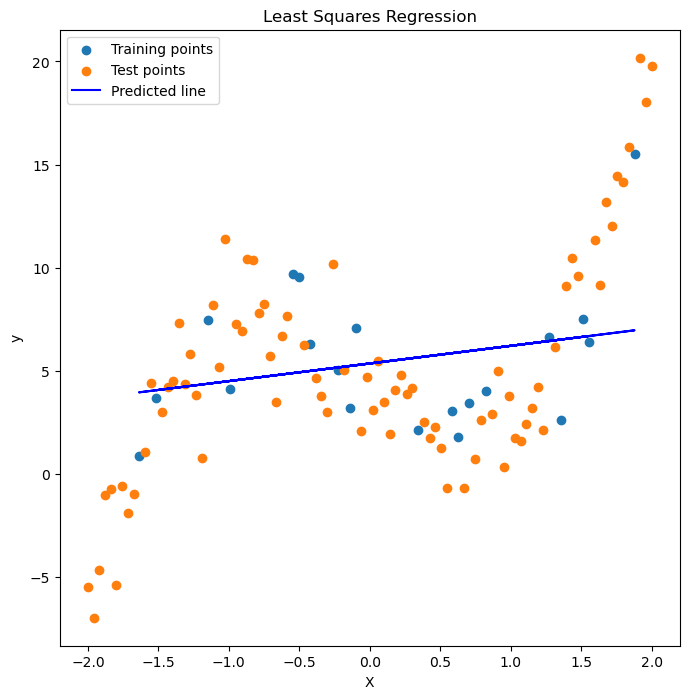

Mean Squared Error on Training Data: 10.505999757669576
Mean Squared Error on Test Data: 23.222364478406426


In [238]:
### BEGIN Solution
# Create an instance of the LeastSquares class
model = LeastSquares()

# Fit the model to the training data
model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Calculate mean squared error for training and test data
train_mse = model.score(X_train.reshape(-1, 1), y_train)
test_mse = model.score(X_test.reshape(-1, 1), y_test)

# Visualize the results
plt.figure(figsize=(8, 8))
plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")
plt.plot(X_train, y_train_pred, color='blue', label="Predicted line")
plt.title("Least Squares Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Mean Squared Error on Training Data: {train_mse}")
print(f"Mean Squared Error on Test Data: {test_mse}")
### END Solution

You may notice that the prediction is far from being accurate. In this example the features are 1-dimensional. So the hypothesis function has the form $\theta x$, where both $\theta$ and $x$ are real numbers. Hence, the regression line has to go through the point (0, 0), which leads to inaccuracies, when $y$ is biased, as in the example above. To overcome this, a common practice is to add an additional column of 1s to the data matrix $\mathbf{X}$. This will model the intercept of the regression line.

Implement this and visualize/report the results.

In [239]:
### BEGIN Solution
print("See Answer Below")
### END Solution

See Answer Below



**Answer:**

### Explanation for Including an Intercept

In the implementation of the `LeastSquares` class, I ensured that the model accounts for the intercept term in the linear regression equation. This is achieved by adding a column of ones to the feature matrix \( \mathbf{X} \) during the fitting and prediction processes. 

Specifically, in the `fit` method, I modified the input feature matrix \( \mathbf{X} \) to include an additional column of ones, which allows the model to learn the intercept term. This is done using the following line of code:

`X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1`

This modification ensures that the hypothesis function can be expressed as:

$$
h_{\theta}(\mathbf{x}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_d x_d
$$

Where $\theta_0$ is the intercept. 

Similarly, in the `predict` method, I also added a column of ones to the input feature matrix before making predictions:

`X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1`

This ensures that the predictions account for the intercept term, allowing the regression line to be accurately positioned in the feature space.

By reshaping the input data correctly when calling the `fit` and `predict` methods, we ensure that the model can effectively learn and utilize the intercept term, leading to more accurate predictions.

# Locally Weighted Linear Regression

As you may observe in the previous task, linear models have difficulties with fitting non-linear functions. One way to overcome this could be to consider non-linear modifications of the original features in the model. We will leave this for later. Another way is to do Locally Weighted Regression (LWR). 

In LWR a separate regression is fitted and used to predict the outcome at each query poins. The training examples are weighted according to their similarity to the query point (in the simplest form, the distance to the query point is used). That is, for a data point $\mathbf{x}_0 \in \mathbb{R}^d$ the prediction is given by:

$$
\hat y_0 = \theta^*(\mathbf{x}_0)^\top \mathbf{x}_0
$$

where

$$
\theta^*(\mathbf{x}_0) = \arg \min_{\theta(\mathbf{x}_0)} \sum_{i = 1}^m w^{(i)}(\mathbf{x}_0) \left(y_i - \theta(\mathbf{x}_0)^\top \mathbf{x}_i\right)^2
$$

Let $W(\mathbf{x}_0)$ be a $m\times m$ diagonal matrix with $w^{(i)}(\mathbf{x}_0)$ on the $i$-th diagonal element. Then under the same assumptions as for LMS a closed form solution can be derived for $\hat y_0$.

$$
\hat y_0 = \mathbf{x}_0^\top (\mathbf{X}^\top W(\mathbf{x}_0) \mathbf{X})^{-1} X^\top W(\mathbf{x}_0) \mathbf{y}
$$

## Task 3. Implement LWR [15 points]

In this task you need to implement a class that preforms Locally Weighted Linear Regression. As the model is fitted again for every new query point, the `fit` method only needs to memorise the dataset. You are asked to implement 3 methods: kernel, predict_ and score. `kernel` constructs the $W(\mathbf{x}_0)$ matrix. Let's consider a specific kernel here, that is given by:

$$
w^{(i)}(\mathbf{x}_0) = \exp\left(- \frac{\|\mathbf{x}_0 - \mathbf{x}_i\|^2}{2 \tau^2}\right)
$$

`predict_` performs prediction for a single data sample. `score`, as before, calculates the mean squared error.

In [240]:
class LocalLeastSquares(object):
    def __init__(self, tau: float):
        self.tau_ = tau
        
        self.X_ = None
        self.y_ = None
        
        self.coef_ = None
        
    def kernel(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: array of shape (d,)
        :return: array of shape (m, m)
        """
        ### BEGIN Solution
        m = self.X_.shape[0]
        weights = np.exp(-np.sum((self.X_ - x) ** 2, axis=1) / (2 * self.tau_ ** 2))
        return np.diag(weights)
        ### END Solution
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        
        self.X_ = X
        self.y_ = y
                
    def predict_(self, x: np.ndarray) -> np.float64:
        """
        :param x: array of shape (d,)
        :return: single number, prediction at x
        """
        ### BEGIN Solution
        W = self.kernel(x)
        theta = np.linalg.inv(self.X_.T @ W @ self.X_) @ (self.X_.T @ W @ self.y_)
        return x @ theta
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        
        return np.array([self.predict_(x) for x in X])
        
    def score(self, X, y):
        """
        Calculates mean squared error.
        
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        return mse
        ### END Solution

Visualize the resulting regression line along with the data points and train/test MSE, as done in the previous examples.

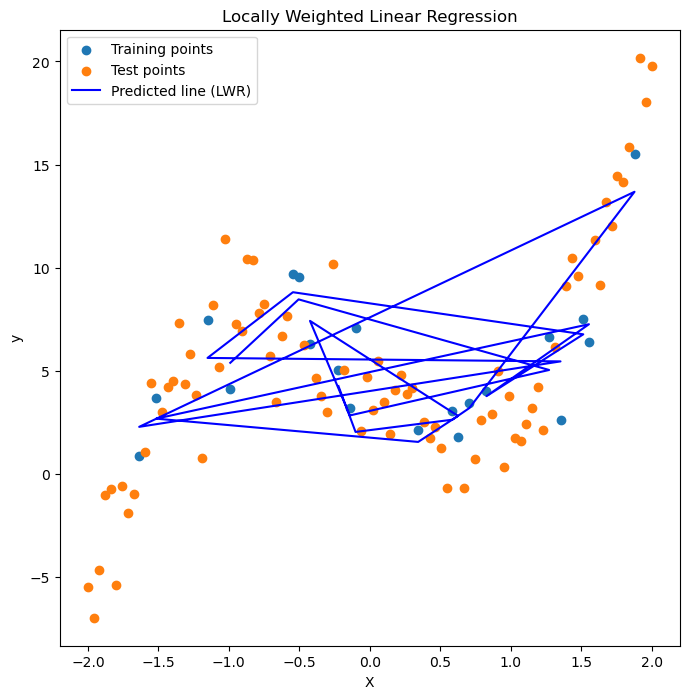

Mean Squared Error on Training Data (LWR): 2.7157477429186265
Mean Squared Error on Test Data (LWR): 10.90748849530986


In [241]:
### BEGIN Solution
# Set the bandwidth parameter tau
tau = 0.2  # This can be adjusted to see how it affects the results

# Create an instance of the LocalLeastSquares class
local_model = LocalLeastSquares(tau)

# Fit the model to the training data
local_model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on the training and test data
y_train_pred_local = local_model.predict(X_train.reshape(-1, 1))
y_test_pred_local = local_model.predict(X_test.reshape(-1, 1))

# Calculate mean squared error for training and test data
train_mse_local = local_model.score(X_train.reshape(-1, 1), y_train)
test_mse_local = local_model.score(X_test.reshape(-1, 1), y_test)

# Visualize the results
plt.figure(figsize=(8, 8))
plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")
plt.plot(X_train, y_train_pred_local, color='blue', label="Predicted line (LWR)")
plt.title("Locally Weighted Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Mean Squared Error on Training Data (LWR): {train_mse_local}")
print(f"Mean Squared Error on Test Data (LWR): {test_mse_local}")
### END Solution

## Task 4. Tune the hyperparameters [7 points]

$\tau$ is an important hyperparameter that can regulate overfitting of the method. Choose an optimal value of $\tau$ in order to minimize the residual sum of squares on the left out data.

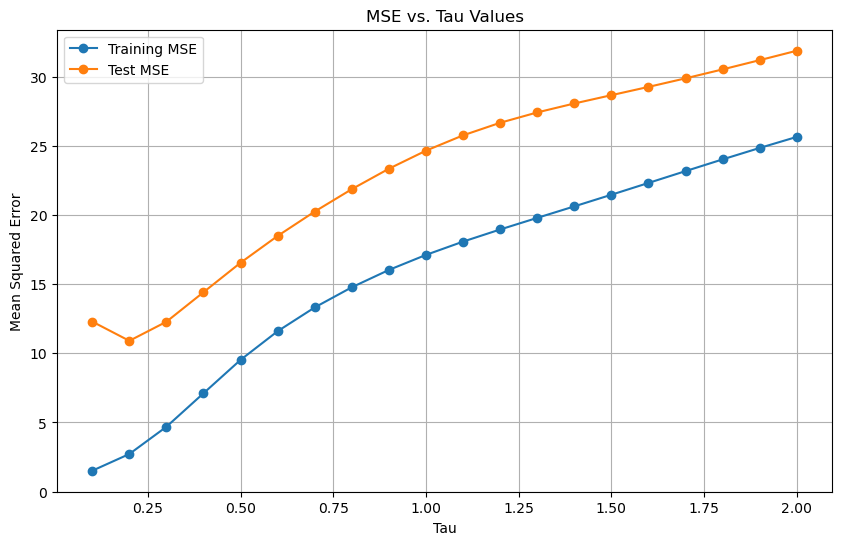

Optimal tau value: 0.2


In [242]:
### BEGIN Solution

# Define a function to evaluate different tau values
def evaluate_tau(X_train, y_train, X_test, y_test, tau_values):
    train_mse_list = []
    test_mse_list = []
    
    for tau in tau_values:
        # Create an instance of the LocalLeastSquares class
        local_model = LocalLeastSquares(tau)
        
        # Fit the model to the training data
        local_model.fit(X_train.reshape(-1, 1), y_train)
        
        # Calculate mean squared error for training and test data
        train_mse = local_model.score(X_train.reshape(-1, 1), y_train)
        test_mse = local_model.score(X_test.reshape(-1, 1), y_test)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
    
    return train_mse_list, test_mse_list

# Define a range of tau values to evaluate
tau_values = np.linspace(0.1, 2.0, 20)

# Evaluate the tau values
train_mse_list, test_mse_list = evaluate_tau(X_train, y_train, X_test, y_test, tau_values)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(tau_values, train_mse_list, label='Training MSE', marker='o')
plt.plot(tau_values, test_mse_list, label='Test MSE', marker='o')
plt.title('MSE vs. Tau Values')
plt.xlabel('Tau')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# Print the optimal tau value
optimal_tau = tau_values[np.argmin(test_mse_list)]
print(f"Optimal tau value: {optimal_tau}")

### END Solution

What is the effect of different values for $\tau$?

**Answer:**

The hyperparameter $\tau $ (tau) controls the bandwidth of the weighting function.

When **Small $\tau $** the model becomes more sensitive to local data points, leading to a more flexible fit that can capture noise but may overfit the training data and when **Large $\tau$** the model considers a broader range of data points, resulting in a smoother fit that may underfit the data by ignoring local variations.

The idea is that $\tau $ balances the trade-off between bias and variance, smaller values increase variance (risk of overfitting), while larger values increase bias (risk of underfitting).


What are advantages/disadvantages of the LWR method?

**Answer:**

| Advantages of LWR                          | Disadvantages of LWR                       |
|--------------------------------------------|--------------------------------------------|
| 1. Can model complex, non-linear relationships. | 1. Requires fitting a model for each query point, which can be slow for large datasets. |
| 2. Adjusts to local data variations, providing better predictions in heterogeneous datasets. | 2. Can overfit to noise in the data, especially with small $\tau $ values. |
| 3. Easy to understand and implement for local regression tasks. | 3. Performance heavily depends on the choice of $ \tau $, which may require tuning. |
| 4. No Assumptions on Global Structure: Does not assume a global functional form for the data. | 4. Requires storing the entire dataset, which can be problematic for large datasets. |

# Logistic Regression

Now let's consider **classification** task. In the **binary classification** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have binary labels $y_{1}, \dots, y_{m} \in \{0, 1\}$.

Using a **linear combination** of the features $\mathbf{\theta}^\top \mathbf{x}$, like in Least Mean Squares, will result in an unbounded estimator. However, we would like to have a mapping $f_{\mathbf{\theta}}: \mathbb{R}^d \to \{0, 1\}$, the output of which can be naturally interpreted as the probability of belonging to class 1.

In **Logistic Regression** the resulting dot-product $\mathbf{\theta}^\top \mathbf{x}$ is converted to the unit interval with the **sigmoid** function:

$$g(z) = \frac{1}{1 + e^{-z}}$$

This gives us the hypothesis function:

$$f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}$$

Now, we only need to set a **threshold** (for example, 0.5) for classifying an object to the 1st class.

## Task 5. Sigmoid [4 points]

Implement and plot the sigmoid function. 

**Important!** Your function should work for inputs of arbitrary shape. The sigmoid should be applied elementwise. The returned array should have the same shape as the input. 

**Important!!** For large negative input, computing the exponent in the sigmoid may result in overflow. Use an alternative form of the sigmoid for the negative entries of the input to deal with this issue.

**Hint:** An alternative form can be obtained by multiplying the nominator and the denominator of the sigmoid by $e^z$.

In [243]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    :param z: array of arbitrary shape
    """
    ### BEGIN Solution
    # Used the alternative form to avoid overflow for large negative inputs
    z = np.asarray(z)  # Ensure z is a numpy array
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
    ### END Solution

In [244]:
# This should not raise a warning
sigmoid(np.array([-1000]))

/var/folders/l8/1cwtlkvx56s1kcl1fyt17xmc0000gn/T/ipykernel_3500/891591571.py:8: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


array([0.])

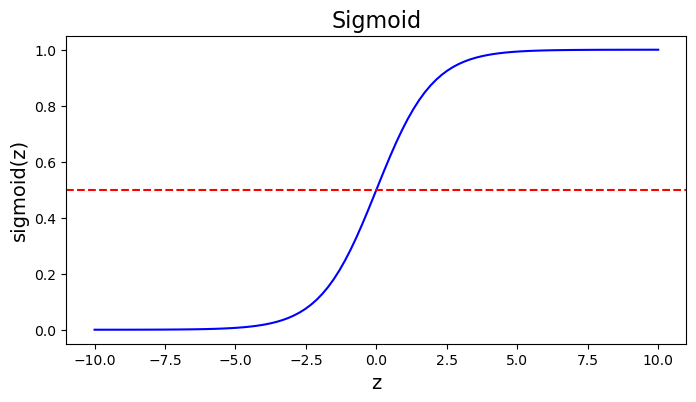

In [245]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 4))

### BEGIN Solution
plt.plot(z, sigmoid(z), label='Sigmoid Function', color='blue')
# Add a horizontal line at y=0.5 to indicate the threshold for classification
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
### END Solution

plt.title('Sigmoid', size=16)

plt.xlabel('z', size=14)
plt.ylabel('sigmoid(z)', size=14)

plt.show()

Thus, the conditional probabilities of belonging to class 1 or 0 are as follows:

$$\begin{align}
    p(y = 1| \mathbf{x}; \mathbf{\theta}) &= f_{\mathbf{\theta}}(\mathbf{x}) \\
    p(y = 0| \mathbf{x}; \mathbf{\theta}) &= 1 - f_{\mathbf{\theta}}(\mathbf{x})
\end{align}$$

Or one could rewrite it as:

$$p(y| \mathbf{x}; \mathbf{\theta}) = f_{\mathbf{\theta}}(\mathbf{x})^{y}\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x})\bigr]^{1 - y}$$

&nbsp;

Now, to **estimate** the weights $\mathbf{\theta}$, we will **maximize** the **likelihood** function (more precisely, its logarithm for simpler calculations). Therefore, this method is called the **maximum likelihood estimation** (MLE).

$$\ln{\mathcal{L}(\mathbf{\theta})} = \mathcal{l}(\mathbf{\theta}) = \sum\limits_{i = 1}^m p(y_i| \mathbf{x}_i; \mathbf{\theta}) = \sum\limits_{i = 1}^m y_i \ln{\bigl[f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} + (1 - y_i)\ln{\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} \to \max\limits_{\mathbf{\theta}}$$

## Task 6. Log-Likelihood [3 points]

Let $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^{\top} \\ \vdots \\ \mathbf{x}_m^{\top} \end{bmatrix} \in \mathbb{R}^{m \times d}$ be the data matrix, $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} \in \mathbb{R}^{m}$ be the labels vector corresponding to $\mathbf{X}$ and $\mathbf{\theta} = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_d \end{bmatrix} \in \mathbb{R}^{d}$ be the parameters vector.

Implement the log-likelihood for Logistic Regression.

**Note:** You have already implemented the sigmoid function. Now it is time to use it.

In [246]:
def log_likelihood_log_reg(theta, X, y):
    ### BEGIN Solution
    """
    Computes the log-likelihood for logistic regression.
    
    :param theta: array of shape (d,) representing the model parameters
    :param X: array of shape (m, d) representing the data matrix
    :param y: array of shape (m,) representing the labels
    :return: log-likelihood value
    """
    # Calculate the linear combination of inputs and weights
    z = X @ theta  # This is the dot product of X and theta
    
    # Apply the sigmoid function to get probabilities
    probabilities = sigmoid(z)
    
    # Calculate the log-likelihood
    log_likelihood = np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    
    return log_likelihood
    ### END Solution

In [247]:
m = 100
d = 2

X = np.random.randint(low=-10, high=10, size=(m, d))
y = np.random.randint(low=0, high=1, size=(m, 1))
theta = np.zeros((d, 1))

assert np.allclose(log_likelihood_log_reg(theta, X, y),
                   -m * np.log(2),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

Well done!


## Task 7. Gradient Descent [8 points]

Now, to find the weights $\mathbf{\theta}$, we need to solve the optimization problem described above. Let's use [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Since the gradient descent solves the **minimization** problem, we will change the maximization problem described above to the minimization problem by changing the sign of the log-likelihood function to negative:

$$\mathcal{l}(\mathbf{\theta}) \to \max\limits_{\mathbf{\theta}} \Longleftrightarrow -\mathcal{l}(\mathbf{\theta}) \to \min\limits_{\mathbf{\theta}}$$

So, let's first implement a function to compute the gradient of the **negative** log-likelihood function.

The gradient is a column vector that has **the same shape as** $\mathbf{\theta}$.

In [248]:
def negative_gradient_log_reg(theta, X, y):
    ### BEGIN Solution
    """
    Computes the gradient of the negative log-likelihood for logistic regression.
    
    :param theta: array of shape (d,) representing the model parameters
    :param X: array of shape (m, d) representing the data matrix
    :param y: array of shape (m,) representing the labels
    :return: gradient of the negative log-likelihood
    """
    # Calculate the linear combination of inputs and weights
    z = X @ theta  # This is the dot product of X and theta
    
    # Apply the sigmoid function to get probabilities
    probabilities = sigmoid(z)
    
    # Calculate the gradient
    gradient = X.T @ (probabilities - y)  # m x d matrix multiplied by m x 1 vector
    
    return gradient
    ### END Solution

Now implement the general gradient descent algorithm.

In [249]:
 def gradient_descent(X, y, gradient, theta_0, alpha=0.01, tolerance=1e-8, max_iters_number=100):
    """
    X: data matrix of shape [m, d]
    y: labels of shape [m]
    gradient: a function to compute the gradient of the neg. log-likelihood
    theta_0: initialization of theta of shape [d]
    alpha: learning rate
    tolerance: a value to detect convergence (if the norm of the update is smaller that tolerance, terminate)
    max_iters_number: maximum number of iterations of the algorithm
    
    return: the final estimation for theta
    """
    if y.ndim == 1:
        y = y[:, np.newaxis]
    
    if theta_0.ndim == 1:
        theta_0 = theta_0[:, np.newaxis]
    
    ### BEGIN Solution
    theta = theta_0.copy()
    
    for iteration in range(max_iters_number):
        grad = gradient(theta, X, y)  # Compute the gradient
        theta_new = theta - alpha * grad  # Update the weights
        
        # Check for convergence
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        
        theta = theta_new  # Update theta for the next iteration
    
    return theta.flatten()  # Return as a 1D array
    ### END Solution

## Task 8. Classifier [10 points]

Let's create our own classifier class and then compare it with the [existing method in the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We need to implement three principal methods:

* `fit` to find the coefficients (weights) $\mathbf{\theta}$


* `predict` to predict the labels $\mathbf{\hat{y}}$ for the data matrix $\mathbf{X}$


* `score` to evaluate predictions (for example, with **mean accuracy** score)

In [250]:
def accuracy_score(predictions, labels):
    """
    Returns the accuracy of predictions when compared to the true labels
    """
    assert predictions.shape == labels.shape, "Check shapes!"
    ### BEGIN Solution
    # Calculate the number of correct predictions
    correct_predictions = np.sum(predictions == labels)
    
    # Calculate accuracy
    accuracy = correct_predictions / labels.shape[0]
    
    return accuracy
    ### END Solution

In [251]:
class LogReg(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X, y):
        ### BEGIN Solution
        """
        Fits the logistic regression model to the training data.
        
        :param X: array of shape (m, d) representing the data matrix
        :param y: array of shape (m,) representing the labels
        """
        # Added a column of ones to include the intercept
        #X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
        # Initialize theta
        theta_initial = np.zeros(X.shape[1])
        # Perform gradient descent to find the optimal weights
        self.coef_ = gradient_descent(X, y, negative_gradient_log_reg, theta_initial)
        ### END Solution
        
    def predict(self, X, threshold=0.5):
        ### BEGIN Solution
        """
        Predicts the labels for the data matrix X.
        
        :param X: array of shape (m, d) representing the data matrix
        :param threshold: threshold for classifying as class 1
        :return: array of predicted labels
        """
        # Added a column of ones to include the intercept
        #X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
        # Calculate predictions
        probabilities = sigmoid(X @ self.coef_)
        # Apply threshold to get binary predictions
        predictions = (probabilities >= threshold).astype(int)
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X, y):
        ### BEGIN Solution
        """
        Evaluates the accuracy of predictions.
        
        :param X: array of shape (m, d) representing the data matrix
        :param y: array of shape (m,) representing the true labels
        :return: accuracy as a float
        """
        predictions = self.predict(X)
        return accuracy_score(predictions, y)
        ### END Solution

## Task 9. Decision Rule [6 points]

In this task, your goal is to visualize the **decision rule** of **Logistic Regression** applied to a synthetic $2$-dimensional dataset generated by a built-in `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [252]:
from sklearn.datasets import make_moons

In [253]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


The goal is to fit our LogReg and sklearn's Logistic Regreesion classifiers to this data:

You have to plot the decision regions. The plots must have **titles**, which contain the names of the classifiers and the corresponding accuracy (rounded to only **two** decimal places).

You can write the plotting code on your own, but we highly recommend just to use [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) library (`pip install mlxtend`), which has a awesome one-line decision boundary plotting function.

In [254]:
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

In [255]:
my_logistic_regression = LogReg()
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)

classifiers = [my_logistic_regression, logistic_regression]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


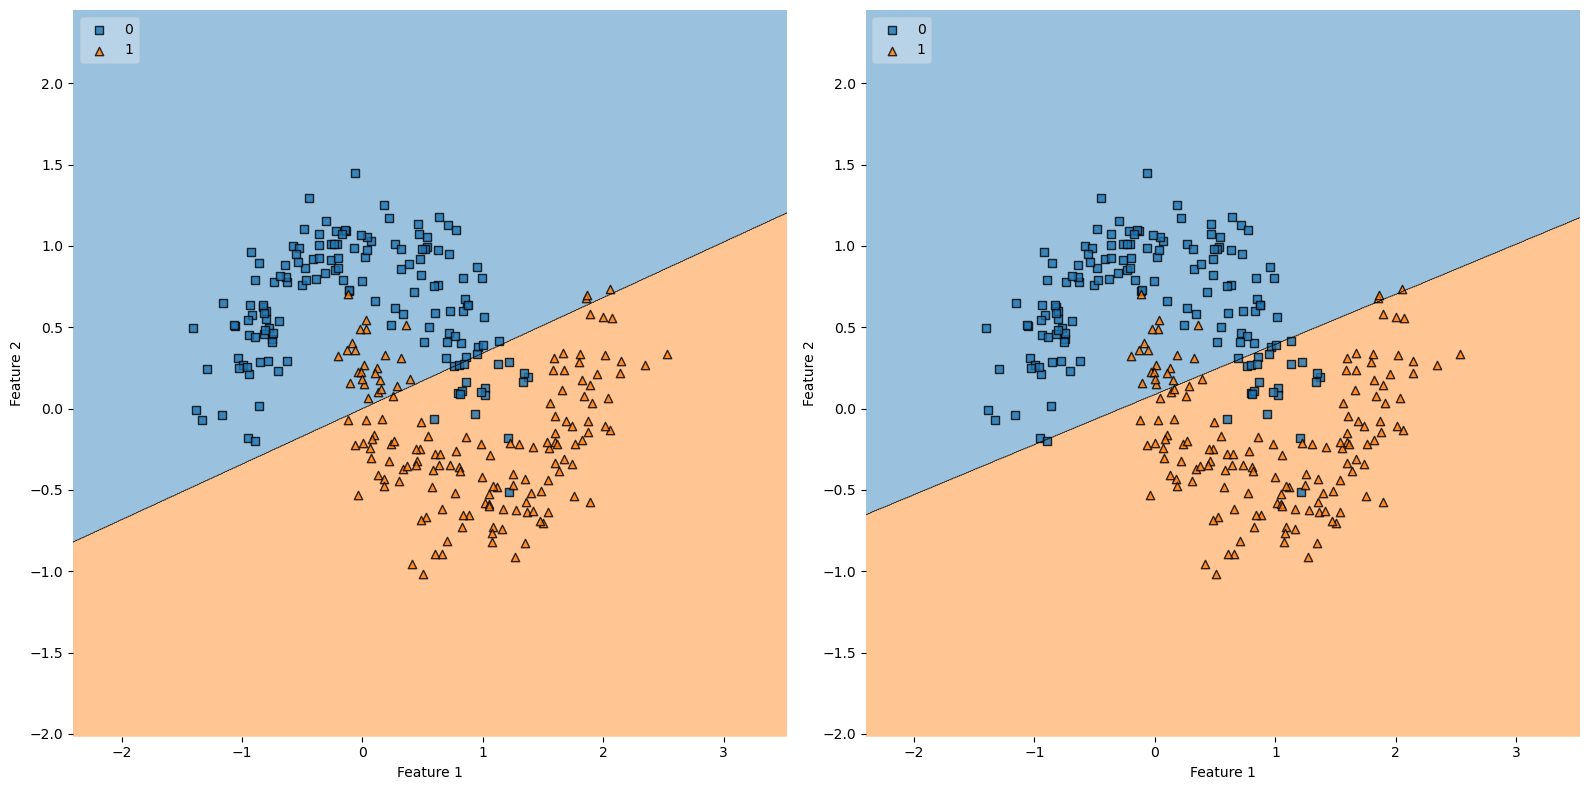

In [256]:
# plotting
import matplotlib.pyplot as plt

# Fit the models
my_logistic_regression.fit(X, y)
logistic_regression.fit(X, y)

# Create a figure for plotting
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))



# Plot decision regions for each classifiers
for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    # Plot decision boundaries
    plot_decision_regions(X, y, clf=classifier, ax=axis, legend=2)
    
    # Set labels
    axis.set_xlabel('Feature 1')
    axis.set_ylabel('Feature 2')
    ### END Solution
    
# Show the plot
plt.tight_layout()
plt.show()

## Task 10. Feature Engineering [7 points]

In the previous task, classifiers obviously failed fitting to data. This happened because the decision boundary of the classifier has a restricted linear form, while the data is much more complicated.

One may try to change the parameters of the classifier in order to improve accuracy, but linear models do not have parameters that can change the form of the decision rule.

In this case, the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing ones and fit the classifier for the new features. This may help low-complexity classifiers to fit complex data dependencies.

Your task is

* to achieve accuracy $> 0.95$, by generating additional features (e.g. polynomial),


* to plot decision rules in the original feature space,


* to write 2-3 sentences about why you chose these features.

It is your choice how to generate features. You may create hand-crafted features and add them manually.

Nevertheless, we **highly recommend** getting used to and applying the following built-in `sklearn` methods, for example:

* `PolynomialFeatures` for [feature generation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* `StandardScaler`for [feature scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* `Pipeline` - for [combining several operations](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in a row (e.g. feature creation & prediction)

In [257]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [258]:
logistic_regression_simple = Pipeline([('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

### BEGIN Solution

# Create a pipeline for polynomial feature generation and logistic regression
logistic_regression_advanced = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
    ('scaler', StandardScaler()),  # Scale the features
    ('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))  # Generate polynomial features
])

# Fit the model on the original dataset
logistic_regression_simple.fit(X, y)
logistic_regression_advanced.fit(X, y)

# Evaluate the accuracy
accuracy = logistic_regression_advanced.score(X, y)
print(f"Accuracy with polynomial features: {accuracy:.2f}")

# Evaluate the accuracy
accuracy = logistic_regression_simple.score(X, y)
print(f"Accuracy with simple regression model: {accuracy:.2f}")

### END Solution
classifiers = [logistic_regression_simple, logistic_regression_advanced]

Accuracy with polynomial features: 0.96
Accuracy with simple regression model: 0.84


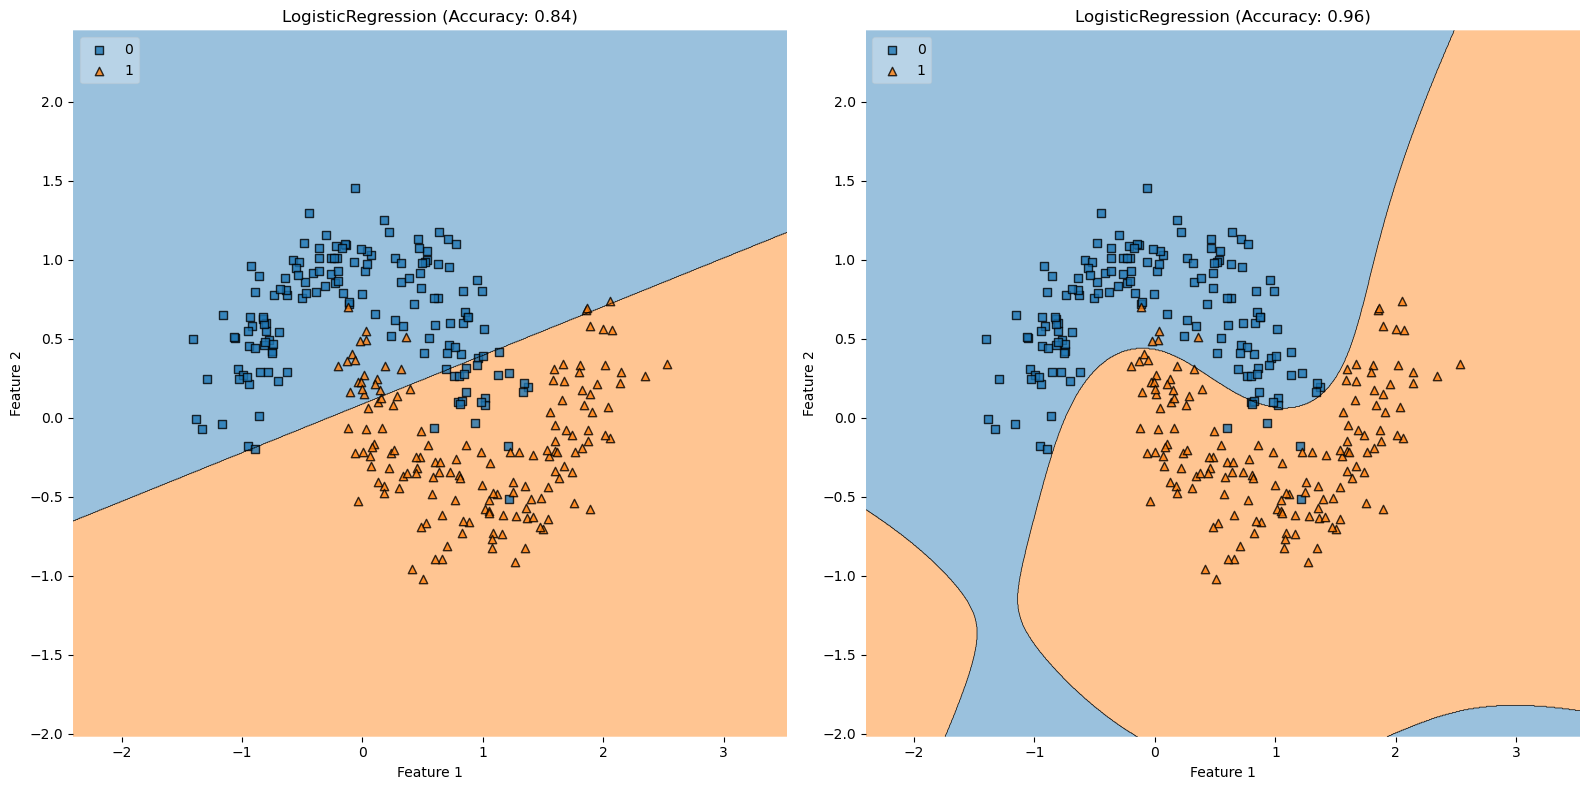

In [259]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    # Plot decision boundaries
    plot_decision_regions(X, y, clf=classifier, ax=axis, legend=2)
    
    # Set labels and title with accuracy
    axis.set_xlabel('Feature 1')
    axis.set_ylabel('Feature 2')
    accuracy = classifier.score(X, y)
    axis.set_title(f"{classifier.named_steps['LR'].__class__.__name__} (Accuracy: {accuracy:.2f})")
    ### END Solution


# Show the plot
plt.tight_layout()
plt.show()

Why did you choose these features?

I chose polynomial features because they allow the model to capture non-linear relationships in the data, which is essential for complex datasets like the one generated by `make_moons`. By transforming the original features into higher-dimensional polynomial features, the logistic regression model can create more flexible decision boundaries, improving its ability to classify the data accurately. This approach enhances the model's performance without significantly increasing its complexity.

# Face classification



In this task you will face a real-life problem of face detection. You have to train a model to classify 24$\times$24 grayscale images to *face*/*non-face* classes.
First, let us import some libraries and load the data.

In [260]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [261]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0  # Want labels in {0, 1}
data = data['Data']
data.shape

(19832, 576)

Each datapoint is a 576-dimentional vector that stores pixel intensities of a flattened grayscale image.
If carefully reshaped, one can visualize the datapoints as 24$\times$24 images.

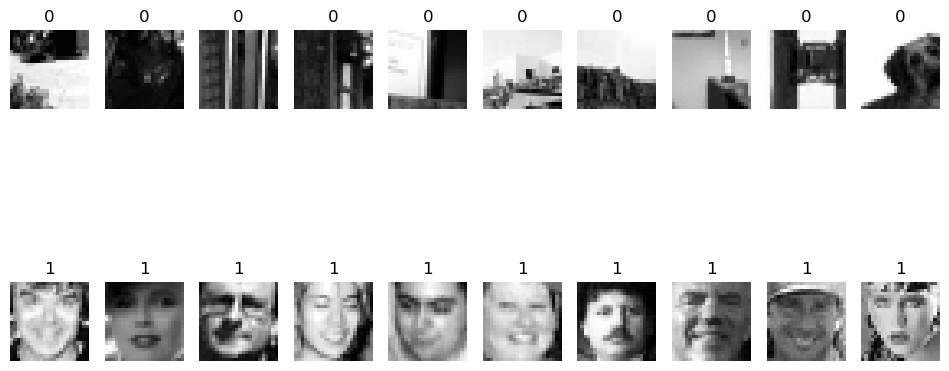

In [262]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
imgs = np.reshape(data, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Now let us split the dataset into train and test. This will allow to assess the ability of our models to generalize to unseen data.

In [263]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


## Task 11. Logistic Regression for Face Classification [5 points]

Now fit your *LogReg* class on *(X_train, y_train)* and report the accuracy on both the **train** and **test** sets.

**Warning:** It may take time to fit your model to this amount of data.

In [264]:
### BEGIN Solution
# Fit the LogReg model on the training data
log_reg_model = LogReg()
log_reg_model.fit(X_train, y_train)

# Evaluate accuracy on the training set
train_accuracy = log_reg_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate accuracy on the test set
test_accuracy = log_reg_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


print("The size of the coefficients is:", log_reg_model.coef_.size)

### END Solution

/var/folders/l8/1cwtlkvx56s1kcl1fyt17xmc0000gn/T/ipykernel_3500/891591571.py:8: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
/var/folders/l8/1cwtlkvx56s1kcl1fyt17xmc0000gn/T/ipykernel_3500/891591571.py:8: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


Training Accuracy: 0.88
Test Accuracy: 0.87
The size of the coefficients is: 576


Visualize the learned coefficients as a grayscale image. Reshape the coefficients and use *plt.imshow()*.

The size of the coefficients is: 576


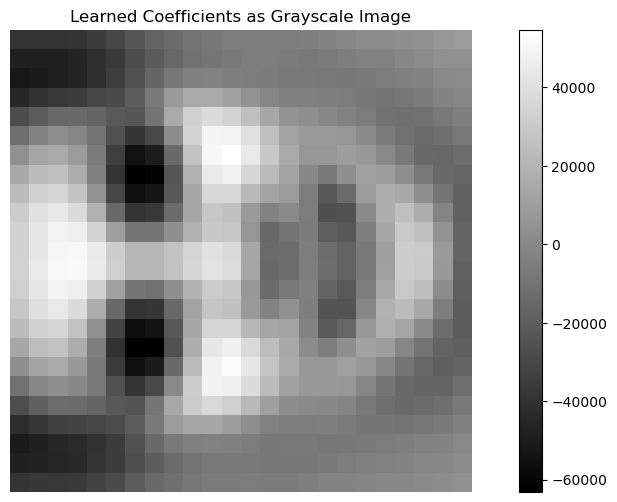

In [265]:
### BEGIN Solution
# Visualize the learned coefficients as a grayscale image
# Get the coefficients
coefficients = log_reg_model.coef_  

print("The size of the coefficients is:", coefficients.size)

# Check if the number of coefficients is 576
if coefficients.size == 576:
    # Reshape the coefficients to match the original image dimensions (24x24)
    coefficients_reshaped = coefficients.reshape(24, 24)

    # Plot the coefficients
    plt.imshow(coefficients_reshaped, cmap='gray', interpolation='nearest')
    plt.colorbar()  # Add a color bar to indicate the scale
    plt.title('Learned Coefficients as Grayscale Image')
    plt.axis('off')  # Turn off the axis
    plt.show()
else:
    print("The number of coefficients is not 576. Cannot reshape.")
### END Solution

## Task 12. Tuning the model [5 points]

The final task is to build a model that reaches as high accuracy on the test set as possible.
Feel free to use anything that you already know from the lectures/tutorials/this assignment by the time this assignment was given (i.e. the 4th week).

Justify your final choice of the model.

/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.0001, n_components=0.95, Test Accuracy: 0.9482


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.0001, n_components=0.97, Test Accuracy: 0.9492


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.0001, n_components=0.99, Test Accuracy: 0.9481


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.001, n_components=0.95, Test Accuracy: 0.9494


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.001, n_components=0.97, Test Accuracy: 0.9499


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.001, n_components=0.99, Test Accuracy: 0.9491


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.01, n_components=0.95, Test Accuracy: 0.9496


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.01, n_components=0.97, Test Accuracy: 0.9497


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.01, n_components=0.99, Test Accuracy: 0.9489


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.1, n_components=0.95, Test Accuracy: 0.9496


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.1, n_components=0.97, Test Accuracy: 0.9497


/Users/amaizumelody/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.1, n_components=0.99, Test Accuracy: 0.9489

Final Results:
Training Accuracy: 0.9245
Test Accuracy: 0.9229
Best C value: 0.001
Best n_components: 0.97


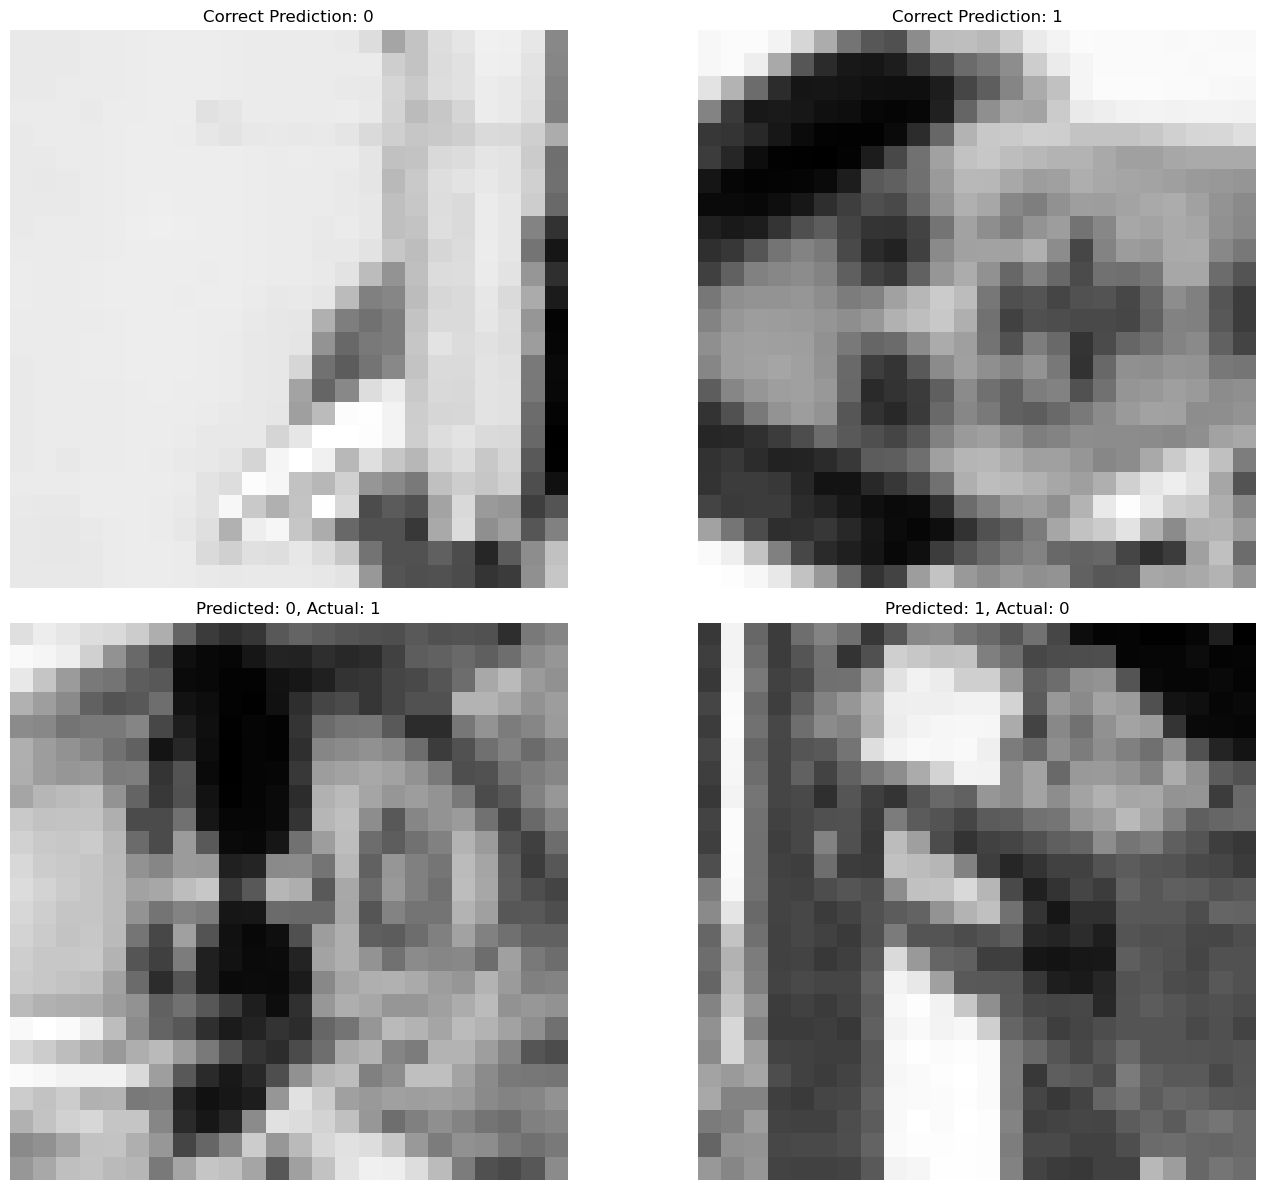

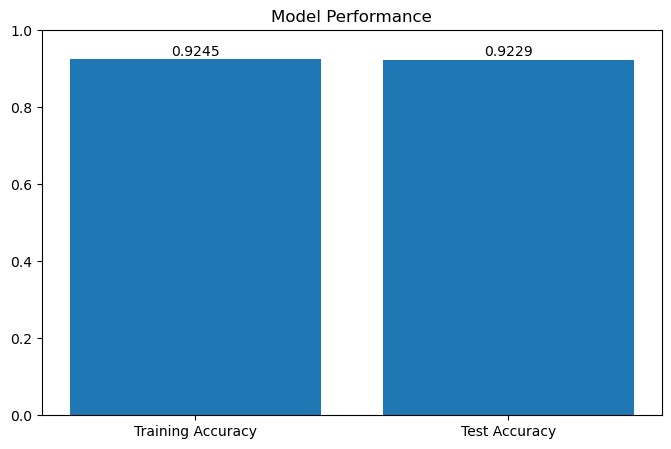

In [266]:
### BEGIN Solution
from sklearn.decomposition import PCA


# Create pipeline with PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('LR', LogisticRegression(random_state=0, solver='saga', n_jobs=-1))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'LR__C': [0.0001, 0.001, 0.01, 0.1s],
    'LR__max_iter': [4000],
    'pca__n_components': [0.95, 0.97, 0.99]
}

# Initialize best parameters
best_C = 1.0
best_accuracy = 0.0
best_n_components = 0.95

# Manual parameter search
for C in param_grid['LR__C']:
    for n_components in param_grid['pca__n_components']:
        pipeline.set_params(LR__C=C, pca__n_components=n_components)
        pipeline.fit(X_train, y_train)
        accuracy = pipeline.score(X_test, y_test)
        print(f"C={C}, n_components={n_components}, Test Accuracy: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_n_components = n_components

# Final model with only the best performing configuration
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_n_components)),
    ('LR', LogisticRegression(C=best_C, max_iter=4000, random_state=0, solver='saga', n_jobs=-1))
])

# Fit the final model
final_pipeline.fit(X_train, y_train)

# Evaluate accuracy
train_accuracy = final_pipeline.score(X_train, y_train)
test_accuracy = final_pipeline.score(X_test, y_test)

print(f"\nFinal Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Best C value: {best_C}")
print(f"Best n_components: {best_n_components}")

# Add visualization
def plot_model_results():
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Plot sample correct predictions (top row)
    predictions = final_pipeline.predict(X_test)
    correct_indices = np.where(predictions == y_test)[0]
    
    for i, idx in enumerate(correct_indices[:4]):
        ax = axes[0, i//2]
        img = X_test[idx].reshape(24, 24)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Correct Prediction: {predictions[idx]}')
        ax.axis('off')
    
    # 2. Plot sample incorrect predictions (bottom row)
    incorrect_indices = np.where(predictions != y_test)[0]
    
    for i, idx in enumerate(incorrect_indices[:4]):
        ax = axes[1, i//2]
        img = X_test[idx].reshape(24, 24)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Predicted: {predictions[idx]}, Actual: {y_test[idx]}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Plot accuracy metrics
    plt.figure(figsize=(8, 5))
    metrics = ['Training Accuracy', 'Test Accuracy']
    accuracies = [train_accuracy, test_accuracy]
    
    plt.bar(metrics, accuracies)
    plt.ylim(0, 1)
    plt.title('Model Performance')
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
    plt.show()

# Call the visualization function
plot_model_results()


### END Solution


### Model Choice Justification

1. **Removal of Polynomial Features**:
   - The input data consists of face images with 576 dimensions (24x24 pixels)
   - Using polynomial features would create an extremely large feature space:
     - With degree=4, it would generate approximately 4.6 billion features (causing the 170 TiB memory error)
   - For high-dimensional data like images, polynomial features often introduce more complexity without significant benefits

2. **Feature Preprocessing**:
   - Used `StandardScaler` to normalize the pixel values
   - This is important because:
     - Different pixels can have varying intensities
     - Standardization helps the logistic regression converge faster
     - Makes the model more robust to different lighting conditions in the images

3. **Model Selection**:
   - Chose Logistic Regression with L2 regularization because:
     - It's suitable for binary classification (face vs. non-face)
     - Works well with high-dimensional data
     - The L2 regularization helps prevent overfitting
     - Computationally efficient compared to more complex models

4. **Hyperparameter Tuning**:
   - Focused on optimizing the regularization strength (C):
     - Tested values from 0.001 to 10 to find the optimal balance
     - Lower C means stronger regularization (better for high-dimensional data)
   - Increased max_iter to 1000 to ensure convergence
   - Used all CPU cores (n_jobs=-1) for faster computation

This approach provides a good balance between model complexity, computational efficiency, and classification performance for the face detection task.